Create a Python script to perform a sentiment analysis of the Twitter activity of  __BBC, CBS, CNN, Fox, and New York times__.

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [20]:
# Target Search Terms
target_users = ("@CNN", "@BBC", "@CBS", "@FOX", "@NYTIMES")
len(target_users)

5

In [6]:
# Variables for holding sentiments
sentiments = []

# Counter
counter = 1

    # Loop through all target users
for user in target_users:

    # Variable for max_id
    oldest_tweet = None
               
    # Run search around each tweet
    public_tweets = api.search(user, count=100, result_type="recent", max_id=oldest_tweet)

    # Loop through all tweets
    for tweet in public_tweets["statuses"]:
        
        new_time = datetime.strptime(tweet["created_at"],"%a %b %d %H:%M:%S %z %Y")
        # Wed Apr 25 19:06:31 +0000 2018   
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        text = tweet['text']
        tweets_ago = counter

        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1


        # Add sentiments for each tweet into a list
        sentiments.append({"Date": new_time, 
                       "User": user,
                       "Compound": compound,
                       "Positive": pos,
                       "Negative": neu,
                       "Neutral": neg,
                       "Tweets Ago": counter,
                       "Tweet Text": text})

        # Add to counter 
        counter += 1


# Print the Sentiments
print(sentiments)

[{'Date': datetime.datetime(2018, 4, 29, 2, 22, 59, tzinfo=datetime.timezone.utc), 'User': '@CNN', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweets Ago': 1, 'Tweet Text': '@CNN Shouldn’t that read” Trump skips event AGAIN???” #CadetBoneSpurs https://t.co/DbwUbaz8KI'}, {'Date': datetime.datetime(2018, 4, 29, 2, 22, 59, tzinfo=datetime.timezone.utc), 'User': '@CNN', 'Compound': -0.8834, 'Positive': 0.0, 'Negative': 0.593, 'Neutral': 0.407, 'Tweets Ago': 2, 'Tweet Text': '@CNN Worst is now that your really being called out for fake news, you people are now crying.'}, {'Date': datetime.datetime(2018, 4, 29, 2, 22, 58, tzinfo=datetime.timezone.utc), 'User': '@CNN', 'Compound': -0.5267, 'Positive': 0.098, 'Negative': 0.677, 'Neutral': 0.226, 'Tweets Ago': 3, 'Tweet Text': 'RT @kazweida: Dear @CNN ,\n\nStop sending me notifications about the nationalist bullshit our banana republic dictator is spouting to a sea o…'}, {'Date': datetime.datetime(2018, 4, 29, 2, 22, 58,

In [7]:
 # Append results to 'results_list'
sentiments_pd = pd.DataFrame.from_dict(sentiments).round(3)
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.000,2018-04-29 02:22:59+00:00,1.000,0.000,0.000,@CNN Shouldn’t that read” Trump skips event AG...,1,@CNN
1,-0.883,2018-04-29 02:22:59+00:00,0.593,0.407,0.000,@CNN Worst is now that your really being calle...,2,@CNN
2,-0.527,2018-04-29 02:22:58+00:00,0.677,0.226,0.098,"RT @kazweida: Dear @CNN ,\n\nStop sending me n...",3,@CNN
3,-0.318,2018-04-29 02:22:58+00:00,0.901,0.099,0.000,"RT @CNN: More women sign up to defend former ""...",4,@CNN
4,0.440,2018-04-29 02:22:58+00:00,0.734,0.000,0.266,@CNN Not funny and not inspiring— just saying ...,5,@CNN
5,0.318,2018-04-29 02:22:57+00:00,0.303,0.000,0.697,@CNN 🙄 please,6,@CNN
6,0.506,2018-04-29 02:22:56+00:00,0.654,0.106,0.240,@CNNTonight @cnn #WHCD These awards on storie...,7,@CNN
7,-0.273,2018-04-29 02:22:56+00:00,0.792,0.208,0.000,@CNN Somebody tell this woman to drop the mic.,8,@CNN
8,0.000,2018-04-29 02:22:56+00:00,1.000,0.000,0.000,@CNN 🤦🏼‍♀️Wow. He is just deplorable.,9,@CNN
9,0.555,2018-04-29 02:22:56+00:00,0.648,0.112,0.241,"@CNN Lol!Sure #maga, give the poor man a medal...",10,@CNN


PLOT 1:
Scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.

In [9]:
#Export dataframe to csv:
sentiments_pd.to_csv("Twitter_News_Mood.csv", index=False)

In [21]:
#checking np.arange array for use on next cell
x_axis = np.arange(0,len(target_users))
x_axis

array([0, 1, 2, 3, 4])

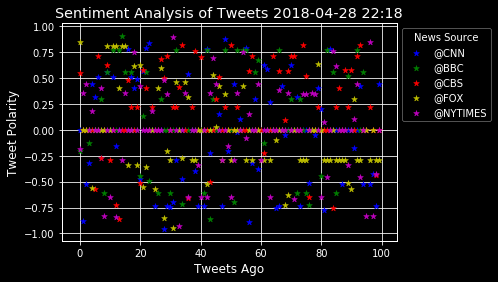

In [29]:
# set the colors
colors=['b', 'g', 'r', 'y', 'm']

plt.style.use('dark_background')

#Loop through target_users to build a scatterplot.
# Use 'np.arange' to create an array of values starting from the the first tweet all the way up to the last one. 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html 

for x in np.arange(0,len(target_users)):
    news_mood = sentiments_pd.loc[sentiments_pd["User"]==target_users[x]]
    
    #Sorting based on the time the tweet was posted. Latest tweet first. 
    news_mood = news_mood.sort_values("Tweets Ago")
    
    # Create an array of compound scores and associate each with a color 
       
    plt.scatter(np.arange(0,len(news_mood["Compound"])), 
            news_mood["Compound"], color = colors[x],
            marker="*", label= target_users[x])


#Add legent, title, x axis label, y axis label, grid

plt.legend(bbox_to_anchor = (1,1), title = 'News Source')        
plt.title(f"Sentiment Analysis of Tweets {datetime.now().strftime('%Y-%m-%d %H:%M')}")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.grid(True)

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()  

PLOT 2: Bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, I will aggregate the compound sentiments analyzed by VADER.


In [72]:
# Get average compound for each source:

average_compound = sentiments_pd.groupby("User")["Compound"].mean()
print(average_compound)
print ("")
print(len(average_compound))

User
@BBC        0.072316
@CBS        0.147680
@CNN       -0.026820
@FOX       -0.040350
@NYTIMES    0.001780
Name: Compound, dtype: float64

5


In [32]:
#Check graph styles available
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

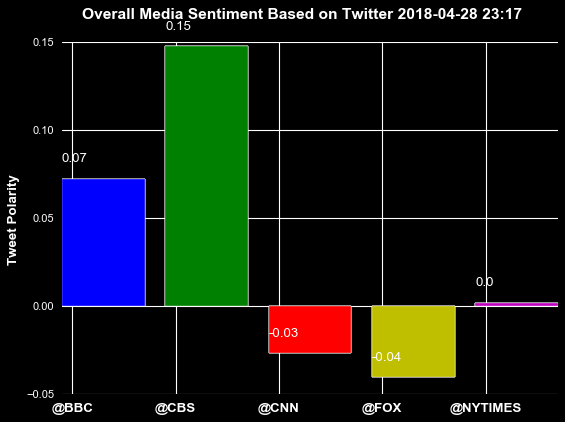

In [70]:
plt.style.use('dark_background')

x_axis = np.arange(len(average_compound))
xlabels = average_compound.index
count = 0

for x in average_compound:
    plt.text(count, x+.01, str(round(x,2)))
    count = count + 1
    plt.bar(x_axis, average_compound, tick_label = xlabels, color = ['b', 'g', 'r', 'y', 'm'])

    tick_locations = [value+0.1 for value in x_axis]
    plt.xticks(tick_locations, fontsize=12, fontweight='bold')
    
    
plt.suptitle(f"Overall Media Sentiment Based on Twitter {datetime.now().strftime('%Y-%m-%d %H:%M')}", fontsize=14, fontweight='bold')

plt.ylabel("Tweet Polarity", fontsize=12, fontweight='bold')
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()